# Escolha do modelo de regressão linear

Vimos no início do bloco sobre **Ajuste de Curvas** que a **Interpolação Polinomial** pode não capturar bem a relação entre $x$ e $y$, embora sempre passe por todos os pontos dados.

No exemplo que utilizamos, analisando o **Diagrama de Dispersão** era possível concluir que a **Regressão Linear Simples**, $f_1(x) = \beta_0 + \beta_1 x$ era muito mais adequada.

Nem sempre é possível tirar conclusões deste tipo visualmente. Em certas situações, poderíamos nos perguntar se seria uma boa ideia adicionar um novo termo à regressão, resultando na função $f_2(x) = \beta_0 + \beta_1 x + \beta_2 x^2$.

Neste caso, nenhuma das métricas de qualidade de ajuste que vimos seria útil para decidir qual das duas funções é "melhor". O coeficiente de determinação, por exemplo, definido por

$$
R^2 = 1 - \frac{\textrm{SQRes}}{\textrm{SQTot}},
$$

onde $\textrm{SQRes} = \sum_i (y_i - f(x_i))^2$ e $\textrm{SQTot} = \sum_i (y_i - \bar y)^2$, será menor para $f_2(x)$ que para $f_1(x)$, assumindo que os parâmetros sejam encontrados, em cada caso, pelo método dos quadrados mínimos.

De fato, poderíamos continuar adicionando novos termos $\beta_3 x^3, \beta_4 x^4, \ldots, \beta_{n-1} x^{n-1}$ até que finalmente tivéssemos desvio $D(\beta) = 0 \Rightarrow R^2 = 1$. Neste caso, o resultado da regressão linear seria igual ao da interpolação polinomial. Claramente, o coeficiente de determinação $R^2$ não pode ser usado para decidir entre um modelo mais simples e outro com mais parâmetros.

Na aula de hoje veremos duas maneiras de decidir qual é o melhor modelo dentre vários modelos possíveis.

## Validação cruzada

Dentre um conjunto de modelos (funções) possíveis para relacionar preditores e a resposta, podemos considerar como sendo o **melhor** aquele que resulta no menor erro de predição para **pontos ainda não-observados**.

Mas como podemos usar esta ideia se não temos como calcular o erro de predição para os pontos não-observados?

...

...

...

**Ideia:** Vamos "fingir" que não vimos alguns desses pontos ainda. Vamos separar X% dos pontos dados e usar o restante para encontar os parâmetros de cada um dos modelos (de regressão, neste caso) que queremos testar.

**Q**: Mas como escolher estes pontos?

...

...

...

Mesmo que a escolha seja aleatória, poderíamos ter dado "sorte".

**Q**: Como fazer para tornar este teste mais robusto?

...

...

...

**Ideia melhorada:** Vamos embaralhar o conjunto de pontos $(x_1,y_1), \ldots, (x_n,y_n)$ e dividí-lo em $K$ partes de tamanho $n/K$. Denotemos cada uma dessas partes por $(X_k,Y_k)$, para $k=1,\ldots,K$. Para cada modelo, vamos repetir o seguinte procedimento:


* Erro = 0
* Para $k=1,\ldots,K$:
    * Conjunto de teste: $(X_k,Y_k)$
    * Conjunto de treinamento: $(X_1,Y_1), \ldots, (X_{k-1},Y_{k-1}), (X_{k+1},Y_{k+1}), \ldots, (X_{K},Y_{K})$.
    * Obter os parâmetros $\beta$ a partir dos pontos no conjunto de treinamento
    * Para cada $(x,y)$ no conjunto de teste $(X_k,Y_k)$:
        * Erro = Erro + $(y - f_\beta (x))^2$
* Erro = Erro / $n$

Ao final, escolhemos o modelo que retorna o menor erro.

**No exemplo a seguir**, vamos revisitar o problema da primeira aula e usar a validação cruzada para decidir entre $f_1(x) = \beta_0 + \beta_1 x$ e $f_2(x) = \beta_0 + \beta_1 x + \beta_2 x^2$.

Text(0,0.5,'y')

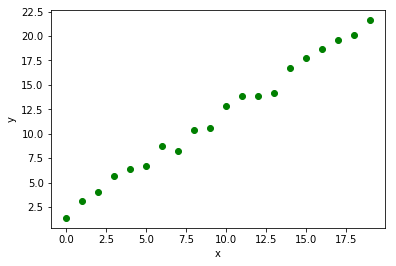

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

b = 2
a = 1

x = np.arange(20)
y = a*x + b + (2*np.random.rand(len(x))-1)

fig, ax = plt.subplots(1,1)
plt.plot(x,y,'go')
plt.xlabel('x')
plt.ylabel('y')

In [7]:
# Embaralhando os pontos:
inds = np.arange(20)
np.random.shuffle(inds)
shuffled_x = x[inds]
shuffled_y = y[inds]
shuffled_x

array([14, 17,  6, 15, 10,  1,  7,  9,  0, 19,  8, 16,  2, 11,  4,  3,  5,
       13, 12, 18])

In [21]:
from sklearn.linear_model import LinearRegression
# Validação cruzada para f(x) = beta0 + beta1x

n = 20
K = 4

lr = LinearRegression()
error = 0.0
for k in range(K):
    test_inds = np.array([False for i in range(n)])
    test_inds[int(k*n/K):int((k+1)*n/K)] = True
    
    test_x = shuffled_x[test_inds].reshape(5,1)
    test_y = shuffled_x[test_inds]
    
    train_x = shuffled_x[~test_inds].reshape(15,1)
    train_y = shuffled_y[~test_inds]
    
    model_1 = lr.fit(X=train_x,y=train_y)
    yhat = model_1.predict(test_x)
    error = np.sum((test_y - yhat)**2)
    
error /= n
print(error)

1.4371138773790613


In [27]:
# Validação cruzada para f(x) = beta0 + beta1 x + beta2 x^2


lr = LinearRegression()
error = 0.0
for k in range(K):
    test_inds = np.array([False for i in range(n)])
    test_inds[int(k*n/K):int((k+1)*n/K)] = True
    
    test_x = shuffled_x[test_inds]
    test_x = np.array([test_x,test_x**2]).T
    test_y = shuffled_x[test_inds]
    
    train_x = shuffled_x[~test_inds]
    train_x = np.array([train_x,train_x**2]).T
    train_y = shuffled_y[~test_inds]
    
    model_1 = lr.fit(X=train_x,y=train_y)
    yhat = model_1.predict(test_x)
    error = np.sum((test_y - yhat)**2)
    
error /= n
print(error)

1.4421232885537378


## Regularização

A validação cruzada é uma excelente solução para comparar um pequeno número de modelos. Contudo, ao considerarmos todos os modelos possíveis dados $p$ preditores, teremos de ajustar e testar $2^p$ modelos. Para $p$ grande, isso impossibilita a seleção de modelos através da validação cruzada.

Veremos agora uma maneira de escolher um modelo de regressão sem que seja preciso testar o conjunto potência dos preditores.

Para motivar o método em questão, vamos voltar ao exemplo anterior. Lembre-se de que a regressão polinomial de grau $n-1$ a partir de $n$ pontos é idêntica a interpolação polinomial desses pontos. O excesso de preditores na regressão linear costuma resultar em valores altos para os parâmetros. Isto pode ser verificado a seguir:

In [28]:
coef = np.polyfit(x,y,deg=19)
coef

/Users/fabricio/anaconda2/envs/py3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


array([ 6.64389193e-14, -1.02135899e-11,  6.95630281e-10, -2.70936649e-08,
        6.32291611e-07, -7.37798133e-06, -4.10546175e-05,  3.55465897e-03,
       -7.79399714e-02,  1.06593890e+00, -1.03076380e+01,  7.32114987e+01,
       -3.85444010e+02,  1.49368139e+03, -4.17220058e+03,  8.08587261e+03,
       -1.01805356e+04,  7.36051437e+03, -2.26402367e+03,  1.37639006e+00])

A solução conhecida como **regularização** consiste em considerar **todos os preditores simultaneamente** e **penalizar** modelos com coeficientes (valores de parâmetros) muito elevados. Veremos a seguir dois tipos de regularização.

### Regularização $L_1$ (LASSO)

Consiste em impor uma restrição à soma dos módulos dos parâmetros $\beta$ (exceto o intercepto $\beta_0$):

$$
\min_\beta D(\beta) = \sum_{i=1}^n (y_i - f_\beta(x_i))^2\\
\textrm{sujeito à $\sum_{j=1}^p |\beta_j| < s$}
$$

para alguma escolha de $s > 0$. Pode-se mostrar que isto é equivalente a

$$
\min_\beta \sum_{i=1}^n (y_i - f_\beta(x_i))^2 + \alpha \sum_{j=1}^p |\beta_j|
$$

para algum $\alpha(s) > 0$.

O efeito do termo de "penalização" $\alpha \sum_{j=1}^p |\beta_j|$ é forçar que os $\beta$'s sejam menores. Note que não estamos mais otimizando o desvio $D(\beta)$. Ou seja, os parâmetros encontrados não serão os parâmetros de quadrados mínimos.

Com a presença do módulo no termo de penalização, esta função objetivo deixa de ser derivável. Felizmente, uma solução aproximada pode ser encontrada em tempo polinomial.

In [48]:
x = x*1.0
x_powers = np.array([np.power(x,i) for i in range(1,19)]).T
#x_powers

In [54]:
from sklearn.linear_model import Lasso

lr1 = Lasso(alpha=0.1)
lr1.fit(x_powers,y)
print(lr1.intercept_,lr1.coef_)

2.1214901542478906 [ 9.71850356e-01  3.54654299e-03 -3.10308690e-04  1.24805949e-05
  8.49748252e-07  2.50299909e-08  1.39669694e-10 -4.19188245e-11
 -3.79674990e-12 -2.31130423e-13 -1.15256639e-14 -4.85706029e-16
 -1.63063259e-17 -2.93979028e-19  1.52643412e-20  2.36499079e-21
  1.99991736e-22  1.40399427e-23]


/Users/fabricio/anaconda2/envs/py3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Regularização $L_2$ (Ridge)

A regularização $L_2$ é semelhante à $L_1$, mas usa a norma-2 como base para a penalização:

$$
\min_\beta D(\beta) = \sum_{i=1}^n (y_i - f_\beta(x_i))^2\\
\textrm{sujeito à $\sum_{j=1}^p \beta_j^2 < s$}
$$

para alguma escolha de $s > 0$. Pode-se mostrar que isto é equivalente a

$$
\min_\beta  \sum_{i=1}^n (y_i - f_\beta(x_i))^2 + \alpha \sum_{j=1}^p \beta_j^2
$$

para algum $\alpha(s) > 0$.

De novo, o efeito do termo de "penalização" $\alpha \sum_{j=1}^p \beta_j^2$ é forçar que os $\beta$'s sejam menores. Esta penalidade é maior que no LASSO para $|\beta_j| > 1$, mas menores que naquele para $|\beta_j| < 1$.

Ao contrário do LASSO, a solução exata para o Ridge pode ser calculada em tempo polinomial. Esta solução é dada por

$$
\beta = (X^\top X + \alpha \mathbf{I})^{-1} X^\top y.
$$

In [63]:
from sklearn.linear_model import Ridge

lr2 = Ridge(alpha=0.1)
lr2.fit(x_powers,y)
print(lr2.intercept_,lr2.coef_)

4.505986784549927 [ 1.36516031e+00 -4.83493572e-07  1.11678717e-04  7.91826901e-02
  4.14803667e-01 -7.35158137e-01  5.06316510e-01 -1.99025341e-01
  5.10051809e-02 -9.08752555e-03  1.16429368e-03 -1.08983126e-04
  7.47148221e-06 -3.71220470e-07  1.30126700e-08 -3.05146107e-10
  4.29533208e-12 -2.74382777e-14]


### Material suplementar

[Complete tutorial Ridge and Lasso Regression in Python](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)